# Load data into pandas DataFrames

In [256]:
import pandas as pd

# Load the dataframes from the CSV files
df_combined_vs = pd.read_csv('Combined_vs.csv', delimiter=';')
df_mcts_vs = pd.read_csv('MCTS_vs.csv', delimiter=';')
df_minimax_vs = pd.read_csv('MiniMax_vs.csv', delimiter=';')
df_logic_vs = pd.read_csv('Logic_vs.csv', delimiter=';')
df_random_vs = pd.read_csv('Random_vs.csv', delimiter=';')

# Merge the dataframes in a single one with only the common columns
common_cols = []
for col in df_combined_vs.columns:
    if col in df_mcts_vs.columns and col in df_minimax_vs.columns and col in df_logic_vs.columns and col in df_random_vs.columns:
        common_cols.append(col)
df = pd.concat(
    objs=[df_combined_vs[common_cols], df_mcts_vs[common_cols], df_minimax_vs[common_cols], df_logic_vs[common_cols], df_random_vs[common_cols]],
    ignore_index=True
)

df

,agent0,agent1,N_BATTLES,winrate,avg_n_turns,avg_n_switches,avg_hp_residue
0,Combined,Random,100,63.00,10.86,0.00,30.42
1,Combined,Random,300,63.33,10.93,0.00,32.34
2,Combined,Logic,100,68.00,11.69,0.00,33.72
3,Combined,Logic,300,69.67,11.61,0.00,36.89
4,Combined,Combined,100,56.00,10.60,0.00,27.64
5,Combined,Combined,300,57.67,10.12,0.00,26.52
6,MCTS,Combined,100,52.00,10.48,1.00,23.49
7,MCTS,MiniMax,100,76.00,10.70,0.89,38.10
8,MCTS,MCTS,100,62.00,10.61,0.84,27.99
9,MCTS,Combined,300,56.33,10.37,0.91,26.19


# Build tables used for the plots

In [257]:
# Initializations
index_dict = {
    'Random': 0,
    'Logic': 1,
    'MiniMax': 2,
    'MCTS': 3,
    'Combined': 4
}
df_winrate_100 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_winrate_300 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_hp_residue_100 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_hp_residue_300 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())

# Generate a dataframe with the winrate associated to all the combinations of battles
for agent in index_dict.keys():
    for opponent in index_dict.keys():
        condition = (df['agent0'] == agent) & (df['agent1'] == opponent)
        if df[condition].shape[0] > 0:
            agent0 = agent
            agent1 = opponent
            complementary_winrate = False
            query = (df['agent0'] == agent0) & (df['agent1'] == agent1)
        else:
            agent0 = opponent
            agent1 = agent
            complementary_winrate = True
            query = (df['agent0'] == agent0) & (df['agent1'] == agent1)
        # Winrate for 100 battles
        row = df[query & (df['N_BATTLES'] == 100)]
        winrate = round(row['winrate'].values[0], ndigits=2)
        df_winrate_100.loc[agent, opponent] = winrate if not complementary_winrate else 100 - winrate
        hp_residue = round(row['avg_hp_residue'].values[0], ndigits=2)
        df_hp_residue_100.loc[agent, opponent] = hp_residue
        # Winrate for 300 battles
        row = df[query & (df['N_BATTLES'] == 300)]
        winrate = round(row['winrate'].values[0], ndigits=2)
        df_winrate_300.loc[agent, opponent] = winrate if not complementary_winrate else 100 - winrate
        hp_residue = round(row['avg_hp_residue'].values[0], ndigits=2)
        df_hp_residue_300.loc[agent, opponent] = hp_residue


### Winrate table over 100 battles

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\2704381518.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_winrate_100 = df_winrate_100.fillna(0).infer_objects()


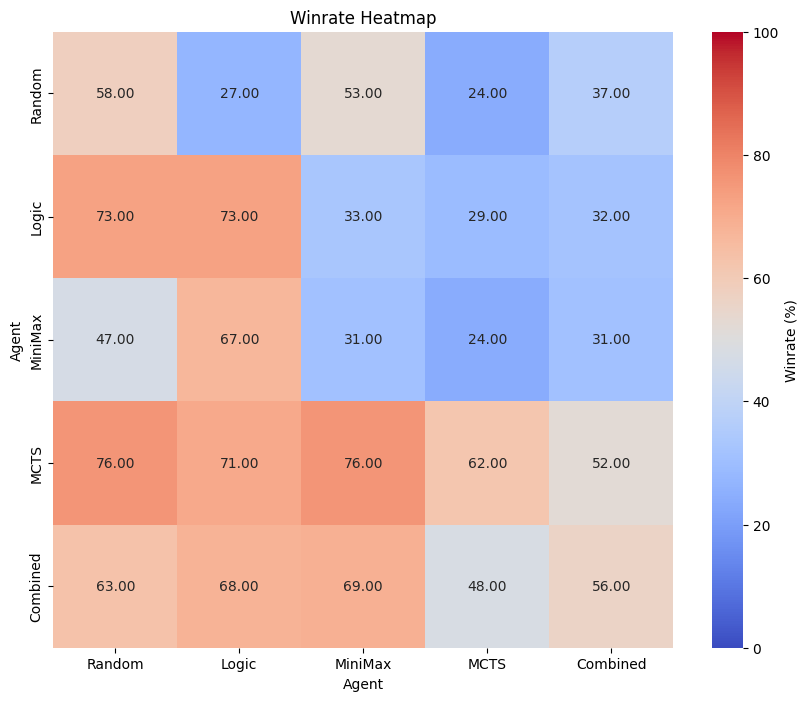

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_winrate_100 = df_winrate_100.fillna(0).infer_objects()
plt.figure(figsize=(10, 8))
sns.heatmap(df_winrate_100, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=100, cbar_kws={'label': 'Winrate (%)'})
plt.xlabel('Agent')
plt.ylabel('Agent')
plt.title('Winrate Heatmap (100 battles)')
plt.show()

### Winrate table over 300 battles

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\1609352719.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_winrate_300 = df_winrate_300.fillna(0).infer_objects()


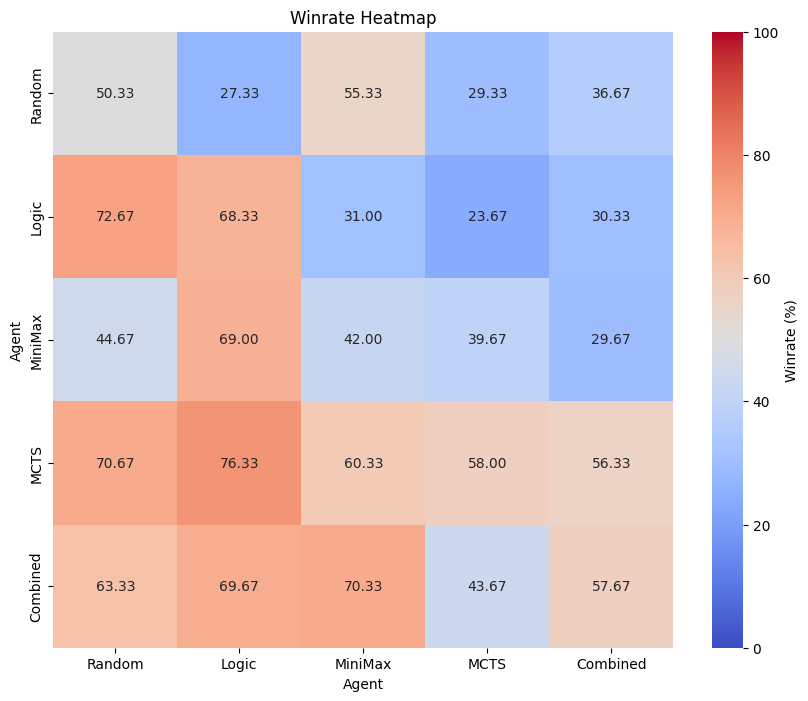

In [ ]:
df_winrate_300 = df_winrate_300.fillna(0).infer_objects()
plt.figure(figsize=(10, 8))
sns.heatmap(df_winrate_300, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=100, cbar_kws={'label': 'Winrate (%)'})
plt.xlabel('Agent')
plt.ylabel('Agent')
plt.title('Winrate Heatmap (300 battles)')
plt.show()

### Average HP residue table over 100 battles

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\2208862829.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hp_residue_100 = df_hp_residue_100.fillna(0).infer_objects()


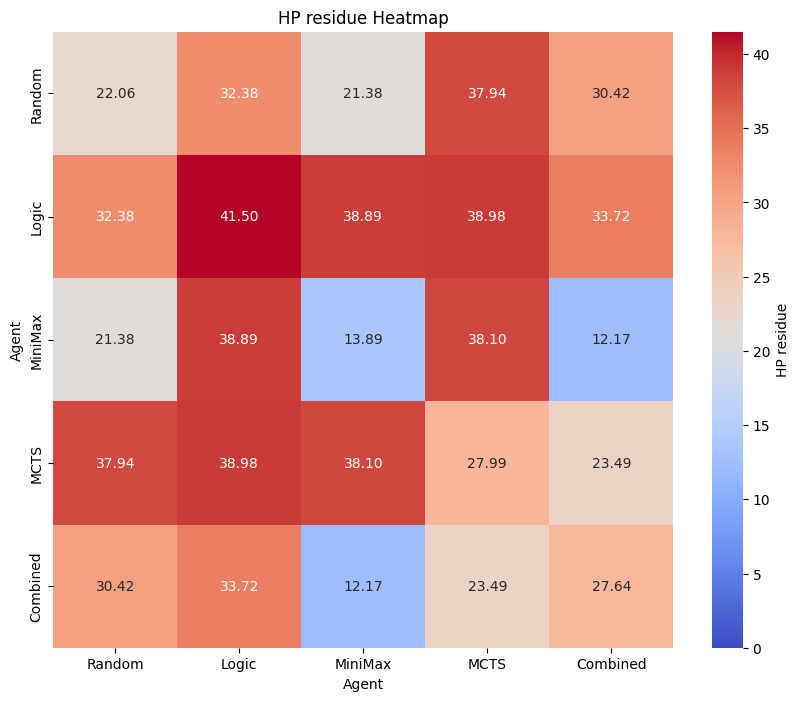

In [260]:
df_hp_residue_100 = df_hp_residue_100.fillna(0).infer_objects()
plt.figure(figsize=(10, 8))
sns.heatmap(df_hp_residue_100, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=df_hp_residue_100.max().max(), cbar_kws={'label': 'HP residue'})
plt.xlabel('Agent')
plt.ylabel('Agent')
plt.title('HP residue Heatmap (100 battles)')
plt.show()

### Average HP residue table over 300 battles

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\1384586040.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hp_residue_300 = df_hp_residue_300.fillna(0).infer_objects()


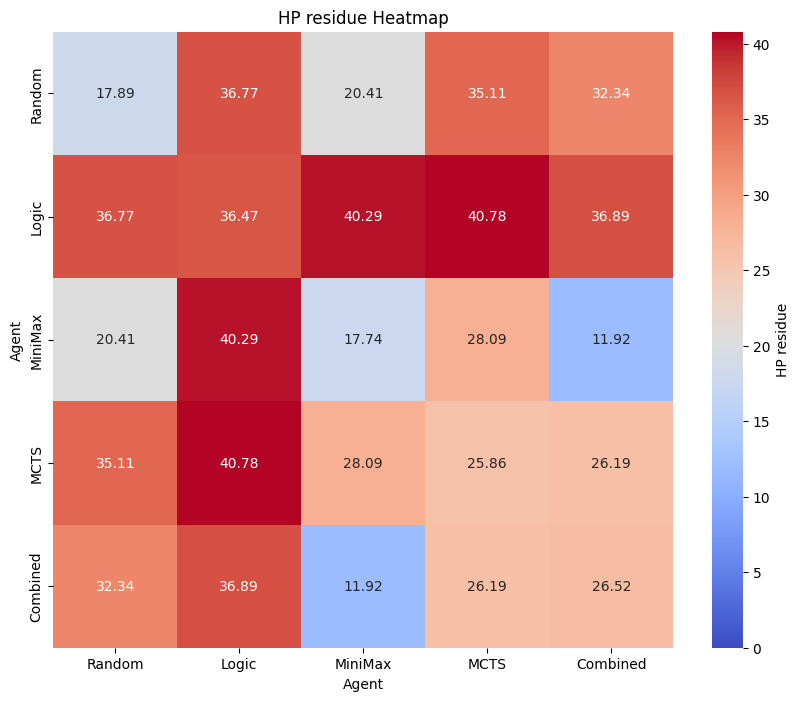

In [261]:
df_hp_residue_300 = df_hp_residue_300.fillna(0).infer_objects()
plt.figure(figsize=(10, 8))
sns.heatmap(df_hp_residue_300, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=df_hp_residue_300.max().max(), cbar_kws={'label': 'HP residue'})
plt.xlabel('Agent')
plt.ylabel('Agent')
plt.title('HP residue Heatmap (300 battles)')
plt.show()

# Winrate diagram vs Random agent

### Winrate diagram of each agent vs Random agent (over 100 battles)

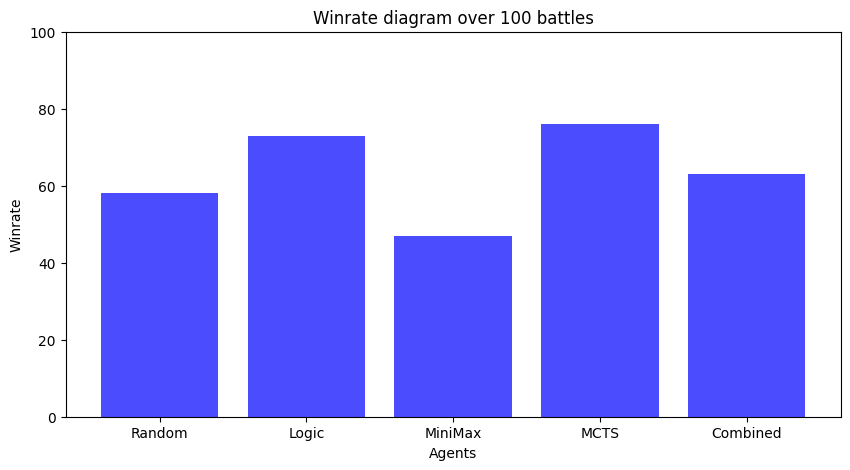

In [262]:
plt.figure(figsize=(10, 5))
plt.bar(df_winrate_100.columns, df_winrate_100['Random'], color='blue', alpha=0.7)
plt.title('Winrate diagram over 100 battles')
plt.xlabel('Agents')
plt.ylabel('Winrate')
plt.ylim(0, 100)
plt.show()

### Winrate diagram of each agent vs Random agent (over 300 battles)

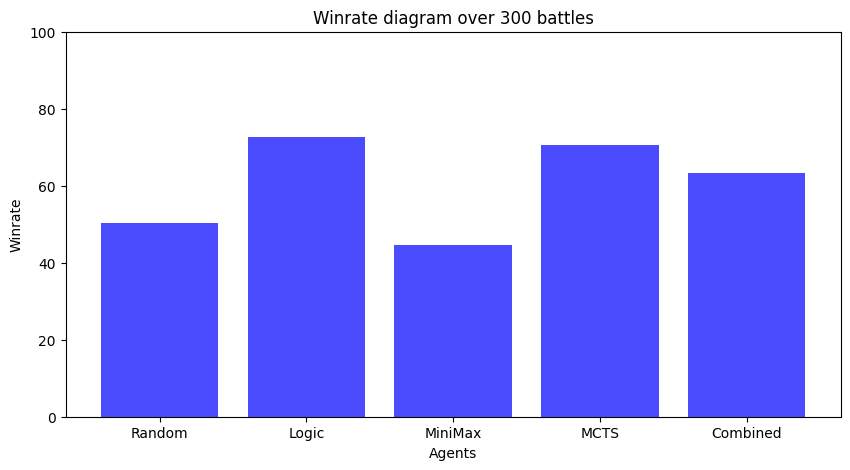

In [263]:
plt.figure(figsize=(10, 5))
plt.bar(df_winrate_300.columns, df_winrate_300['Random'], color='blue', alpha=0.7)
plt.title('Winrate diagram over 300 battles')
plt.xlabel('Agents')
plt.ylabel('Winrate')
plt.ylim(0, 100)
plt.show()

### HP residue diagram of each agent vs Random agent (over 100 battles)

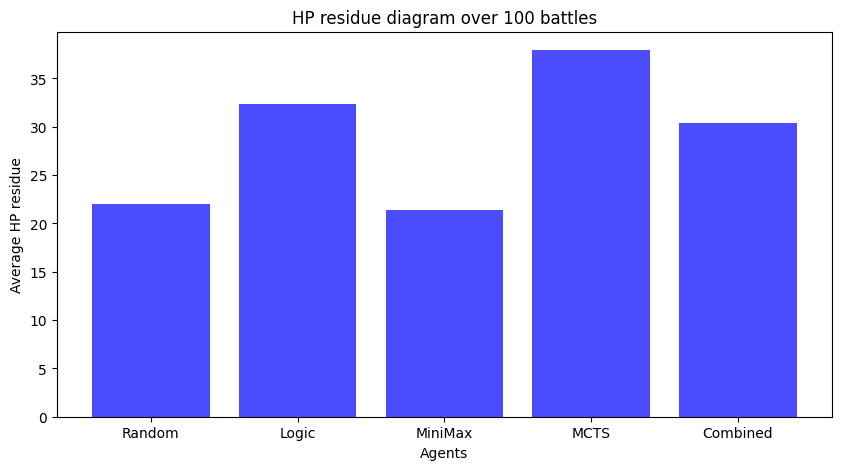

In [264]:
plt.figure(figsize=(10, 5))
plt.bar(df_hp_residue_100.columns, df_hp_residue_100['Random'], color='blue', alpha=0.7)
plt.title('HP residue diagram over 100 battles')
plt.xlabel('Agents')
plt.ylabel('Average HP residue')
plt.show()

### HP residue diagram of each agent vs Random agent (over 300 battles)

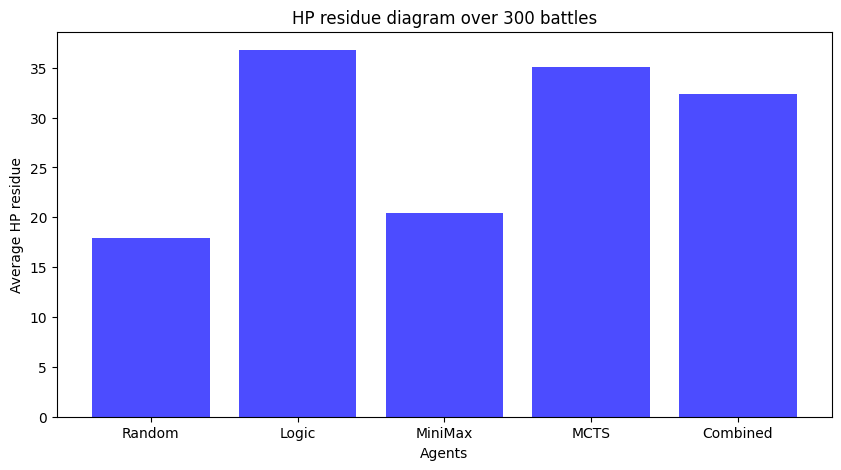

In [265]:
plt.figure(figsize=(10, 5))
plt.bar(df_hp_residue_300.columns, df_hp_residue_300['Random'], color='blue', alpha=0.7)
plt.title('HP residue diagram over 300 battles')
plt.xlabel('Agents')
plt.ylabel('Average HP residue')
plt.show()